In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
bs = 64

In [6]:
path=Path("../../datasets")
path

PosixPath('../../datasets')

In [8]:
path.ls()

[PosixPath('../../datasets/Kissing'),
 PosixPath('../../datasets/.ipynb_checkpoints'),
 PosixPath('../../datasets/Kicking'),
 PosixPath('../../datasets/Dining'),
 PosixPath('../../datasets/HighFive'),
 PosixPath('../../datasets/Partying'),
 PosixPath('../../datasets/Talking'),
 PosixPath('../../datasets/Hugging'),
 PosixPath('../../datasets/Boxing-Punching'),
 PosixPath('../../datasets/models'),
 PosixPath('../../datasets/Handshaking'),
 PosixPath('../../datasets/Speech')]

In [6]:
path_kissing = path/'Kissing'
path_kicking = path/'Kicking'
path_dining = path/'Dining'
path_highfive = path/'HighFive'
path_partying = path/'Partying'
path_talking = path/'Talking'
path_hugging= path/'Hugging'
path_boxing_punching = path/'Boxing-Punching'
path_handshaking = path/'Handshaking'
path_Speech = path/'Speech'

In [7]:
fnames=get_image_files(path_kissing)
fnames[:5]

[PosixPath('../../datasets/Kissing/103.jpg'),
 PosixPath('../../datasets/Kissing/058.jpg'),
 PosixPath('../../datasets/Kissing/186.jpg'),
 PosixPath('../../datasets/Kissing/118.jpg'),
 PosixPath('../../datasets/Kissing/132.jpg')]

In [8]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [9]:
data.classes

['Boxing-Punching',
 'Dining',
 'Handshaking',
 'HighFive',
 'Hugging',
 'Kicking',
 'Kissing',
 'Partying',
 'Speech',
 'Talking']

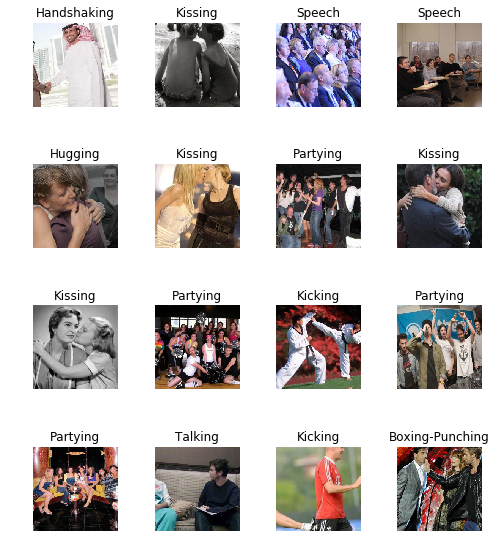

In [10]:
data.show_batch(rows=4, figsize=(7,8))

In [18]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Boxing-Punching',
  'Dining',
  'Handshaking',
  'HighFive',
  'Hugging',
  'Kicking',
  'Kissing',
  'Partying',
  'Speech',
  'Talking'],
 10,
 1578,
 394)

## Train model

In [11]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.599434,0.929417,0.324873,00:24
1,1.088072,0.796305,0.271574,00:14
2,0.835905,0.714469,0.253807,00:15
3,0.688526,0.686050,0.251269,00:14


In [23]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [13]:
learn.save('test-1')

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

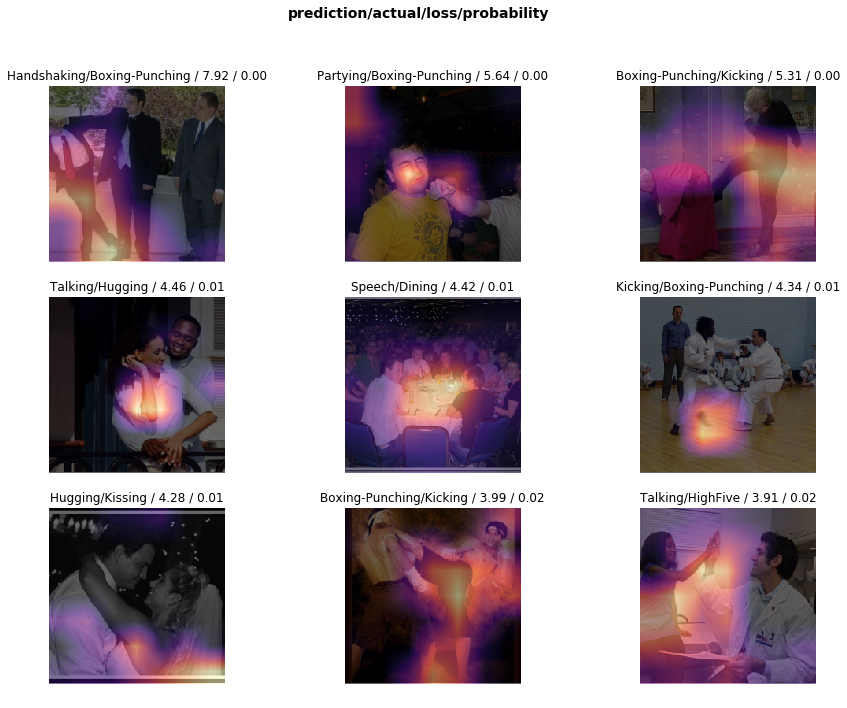

In [15]:
interp.plot_top_losses(9, figsize=(15,11))

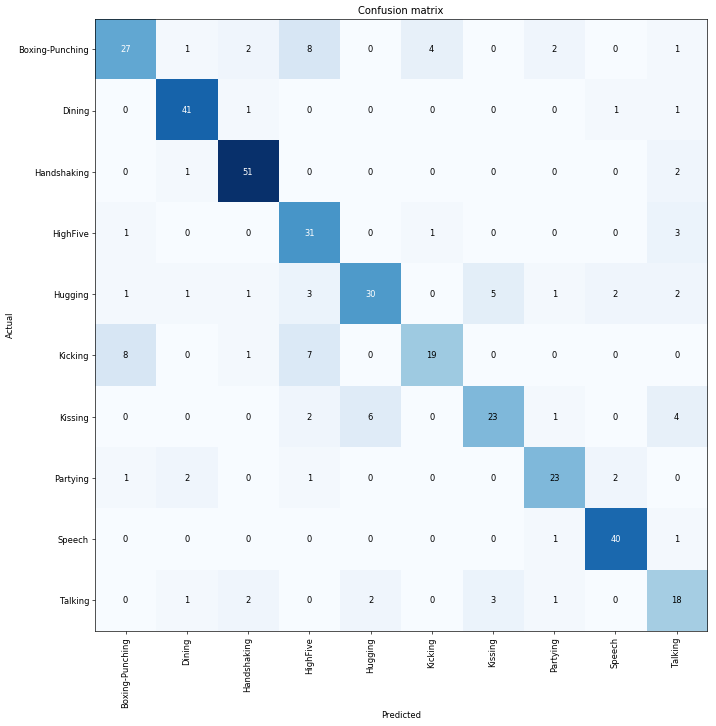

In [29]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:
interp.most_confused(min_val=2)

[('Boxing-Punching', 'Kicking', 11),
 ('Kicking', 'Boxing-Punching', 7),
 ('Boxing-Punching', 'HighFive', 6),
 ('Kissing', 'Hugging', 6),
 ('Talking', 'Hugging', 6),
 ('Hugging', 'Talking', 5),
 ('Kicking', 'HighFive', 5),
 ('Handshaking', 'Talking', 4),
 ('Hugging', 'Kissing', 4),
 ('Kissing', 'Talking', 4),
 ('Handshaking', 'HighFive', 3),
 ('Boxing-Punching', 'Handshaking', 2),
 ('Boxing-Punching', 'Hugging', 2),
 ('Boxing-Punching', 'Partying', 2),
 ('Hugging', 'Boxing-Punching', 2),
 ('Hugging', 'HighFive', 2),
 ('Talking', 'Handshaking', 2),
 ('Talking', 'Partying', 2)]

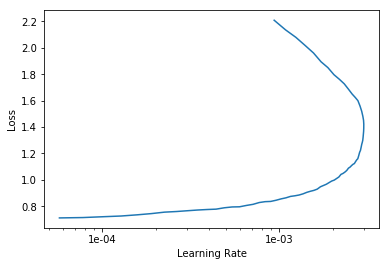

In [17]:
learn.recorder.plot()

In [18]:
learn.unfreeze()

In [19]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.628371,0.812613,0.230964,00:15


In [20]:
learn.load('test-1')

Learner(data=ImageDataBunch;

Train: LabelList (1578 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Kissing,Kissing,Kissing,Kissing,Kissing
Path: ../../datasets;

Valid: LabelList (394 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Partying,Partying,Handshaking,Hugging,Talking
Path: ../../datasets;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


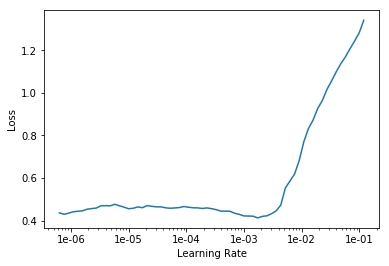

In [37]:
learn.recorder.plot()

In [22]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.467588,0.637786,0.210660,00:16
1,0.429321,0.594796,0.197970,00:16
2,0.352644,0.554704,0.195431,00:15
3,0.289700,0.563863,0.205584,00:16


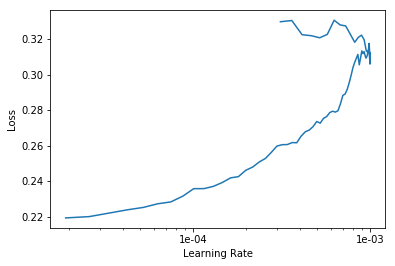

In [40]:
learn.recorder.plot()

In [46]:
data = ImageDataBunch.from_folder(path, fnames, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

/home/stan_demontmarin/.conda/envs/fastai/lib/python3.7/site-packages/fastai/data_block.py:442: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/home/stan_demontmarin/.conda/envs/fastai/lib/python3.7/site-packages/fastai/data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


IndexError: index 0 is out of bounds for axis 0 with size 0